In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [15]:
pd.options.display.max_rows = 6000
pd.options.display.max_columns = 80

data = pd.read_csv('./brazilian-cities/BRAZIL_CITIES.csv', sep=";", decimal=",")

##note que a df está sem a feature AREA e RURAL_URBAN

ft1 = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$", "IDHM Ranking 2010", "IDHM", "IDHM_Renda", "IDHM_Longevidade", "IDHM_Educacao", "LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df1 = data[ft1]

ft = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$","LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df = data[ft]

In [16]:
df['LONG'] = df['LONG'].astype(float)
df['LAT'] = df['LAT'].astype(float)
df['ALT'] = df['ALT'].astype(float)
#df['AREA'] = df['AREA'].astype(float)
#df['RURAL_URBAN'] = df['RURAL_URBAN'].astype(float)
df['GVA_AGROPEC'] = df['GVA_AGROPEC'].astype(float)
df['GVA_INDUSTRY'] = df['GVA_INDUSTRY'].astype(float)
df['GVA_SERVICES'] = df['GVA_SERVICES'].astype(float)
df['GVA_PUBLIC'] = df['GVA_PUBLIC'].astype(float)
df['TAXES'] = df['TAXES'].astype(float)
df['GDP'] = df['GDP'].astype(float)
df['GDP_CAPITA'] = df['GDP_CAPITA'].astype(float)


/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

KeyError: 'GDP_CAPITA'

In [17]:
df1['IDHM'] = df1['IDHM'].astype(float)

def get_rotulo(value):
    if value >= 0.8:
        return "muito_alto"
    elif 0.69 < value <= 0.79:
        return "alto"
    elif 0.59 < value <= 0.69:
        return "médio"
    elif 0.49 < value <= 0.59:
        return "baixo"
    else:
        return "muito_baixo"

df["rótulo"] = df1['IDHM'].apply(get_rotulo)

/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/giovanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [18]:
print(len(df.columns))

67


In [19]:
print(df.dtypes)

IBGE_RES_POP              float64
IBGE_RES_POP_BRAS         float64
IBGE_RES_POP_ESTR         float64
IBGE_DU                   float64
IBGE_DU_URBAN             float64
IBGE_DU_RURAL             float64
IBGE_POP                  float64
IBGE_1                    float64
IBGE_1-4                  float64
IBGE_5-9                  float64
IBGE_10-14                float64
IBGE_15-59                float64
IBGE_60+                  float64
IBGE_PLANTED_AREA         float64
IBGE_CROP_PRODUCTION_$    float64
LONG                      float64
LAT                       float64
ALT                       float64
PAY_TV                    float64
FIXED_PHONES              float64
ESTIMATED_POP             float64
GVA_AGROPEC               float64
GVA_INDUSTRY              float64
GVA_SERVICES              float64
GVA_PUBLIC                float64
TAXES                     float64
GDP                       float64
POP_GDP                   float64
MUN_EXPENDIT              float64
COMP_TOT      

In [20]:
df=  df.fillna(0)

In [32]:
#separação da classe em y
X = df.iloc[:, 0:65].values
y = df.iloc[:, 66].values

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestClassifier

#100 árvores
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8170403587443946

Feature ranking:
1. feature 16 (0.082755)
2. feature 15 (0.067381)
3. feature 37 (0.048060)
4. feature 19 (0.046364)
5. feature 5 (0.046131)
6. feature 59 (0.044098)
7. feature 32 (0.028077)
8. feature 1 (0.022880)
9. feature 0 (0.022523)
10. feature 42 (0.022487)
11. feature 27 (0.021991)
12. feature 17 (0.021877)
13. feature 29 (0.021614)
14. feature 38 (0.020536)
15. feature 13 (0.020055)
16. feature 20 (0.019960)
17. feature 40 (0.018077)
18. feature 3 (0.017294)
19. feature 14 (0.016850)
20. feature 60 (0.016411)
21. feature 18 (0.014978)
22. feature 23 (0.014526)
23. feature 25 (0.014514)
24. feature 35 (0.013939)
25. feature 43 (0.013886)
26. feature 24 (0.013804)
27. feature 9 (0.013666)
28. feature 21 (0.013616)
29. feature 22 (0.013537)
30. feature 10 (0.012970)
31. feature 47 (0.012881)
32. feature 41 (0.012543)
33. feature 26 (0.012045)
34. feature 8 (0.011987)
35. feature 30 (0.011960)
36. feature 11 (0.011560)
37. feature 36 (0.011473)
38. feature 61 (0.011255)
39. featur

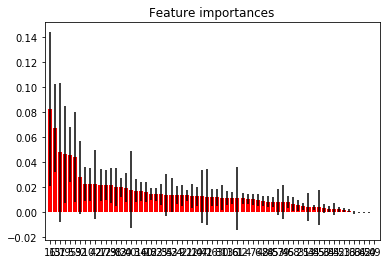

In [25]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

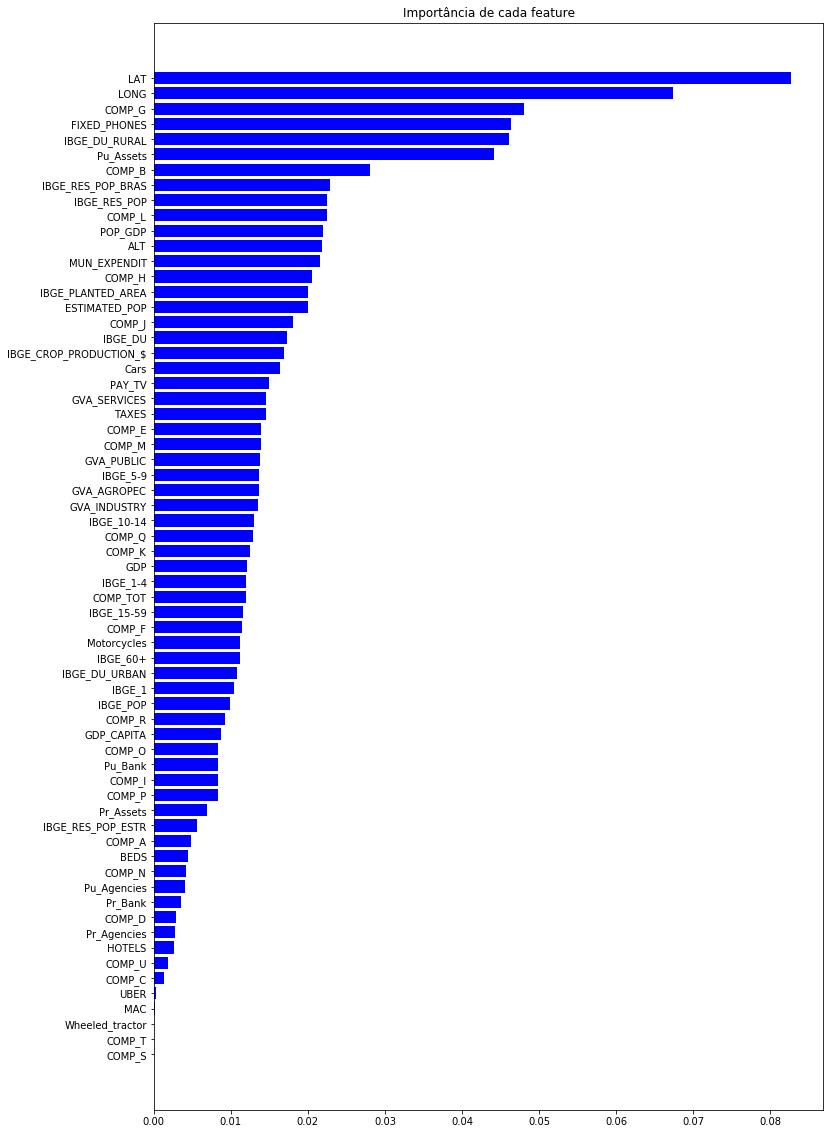

In [26]:
features = ["IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$","LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "ESTIMATED_POP", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 20))
plt.title('Importância de cada feature')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()


In [34]:
def metrics (y_test, y_pred):
  ac = accuracy_score(y_test, y_pred)
  rec = recall_score(y_test,y_pred, average= 'weighted')
  prec = precision_score(y_test,y_pred, average='weighted')
  return (ac, rec, prec)

In [33]:
acuracia, recall, precisao= metrics(y_test,y_pred)
stringSaida= "acuracia = {ac} , recall = {rec} , precisao = {prec} ".format (ac = acuracia, rec = recall, prec = precisao)
print (stringSaida)

acuracia = 0.8170403587443946 , recall = 0.8170403587443946 , precisao = 0.8115362136383224 


/home/giovanna/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
